# Prototype: Compute cell volumes and face areas using lookup table in HEC-RAS HDF5 file

This notebook contains code to compute cell volumes and face areas using the current water surface elevation for each cell. The volumes and face areas
of incompletely inundated cells is stored in tables in the HEC-RAS HDF file. A lookup table approach is used below to interpolate the cell volume
and face area of each cell using that cell's water surface elevation at the current time step.

Note: The code in this notebook uses xarray and pandas to store the data read from HDF5, display the metadata, etc. However, the only benefit of this
approach is it improves the data management. In order to rapidly compute the cell volumes and face areas using numba, all values needed to be extracted 
as numpy arrays.

In [1]:
import pandas as pd
import seaborn as sns

sns.set(rc={'figure.figsize':(12,8)})
sns.set_style('whitegrid')
import clearwater_riverine_functions as cw

## Example: Compute the cell volumes for the Muncie example watershed

### Read the data

In [2]:
# HEC-RAS input file
infile = '../tests/input_files/Muncie.p04.hdf'

# Results time series: Water Surface Elevation
water_surface_elev_xr = cw.read_dataset_xarray(infile, 'Results/Unsteady/Output/Output Blocks/Base Output/Unsteady Time Series/2D Flow Areas/2D Interior Area/Water Surface', dims = ['Time', 'Cells'])

# Geometry: Cell Volumes
cells_volume_elevation_info_df = cw.read_dataset_pandas(infile, 'Geometry/2D Flow Areas/2D Interior Area/Cells Volume Elevation Info')
cells_volume_elevation_values_df = cw.read_dataset_pandas(infile, 'Geometry/2D Flow Areas/2D Interior Area/Cells Volume Elevation Values')

# Geometry: Cell Surface Area
cells_surface_area_xr = cw.read_dataset_xarray(infile, 'Geometry/2D Flow Areas/2D Interior Area/Cells Surface Area', dims = ['Rows'])

# Display the data
# display(water_surface_elev_xr)
# display(cells_volume_elevation_info_df)
# display(cells_volume_elevation_values_df)
# display(cells_surface_area_xr)

#### Compute the cell volumes

In [3]:
# ntimes = 289
# ncells = 5765
ntimes, ncells = water_surface_elev_xr.shape

cell_volumes = cw.compute_cell_volumes(
    water_surface_elev_xr.values,
    cells_surface_area_xr.values,
    cells_volume_elevation_info_df['Starting Index'].values,
    cells_volume_elevation_info_df['Count'].values,
    cells_volume_elevation_values_df['Elevation'].values,
    cells_volume_elevation_values_df['Volume'].values,
    ntimes,
    ncells)
cell_volumes_df = pd.DataFrame(cell_volumes, columns = range(ncells))
cell_volumes_df

,0,1,2,3,4,5,6,7,8,9,...,5755,5756,5757,5758,5759,5760,5761,5762,5763,5764
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284,11781.545898,10580.918945,11696.687500,11255.155273,10983.076172,15212.147461,13285.705078,15499.646484,17601.767578,19045.613281,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
285,11777.916016,10577.850586,11693.376953,11251.775391,10979.221680,15208.108398,13282.004883,15495.236328,17596.714844,19040.261719,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
286,11774.286133,10574.782227,11690.066406,11248.395508,10975.367188,15204.069336,13278.303711,15490.826172,17591.662109,19035.130859,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
287,11770.656250,10571.713867,11686.755859,11245.014648,10971.513672,15200.031250,13274.603516,15486.416016,17586.609375,19029.556641,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Plot the cell volumes

Text(0, 0.5, 'Cell Volume')

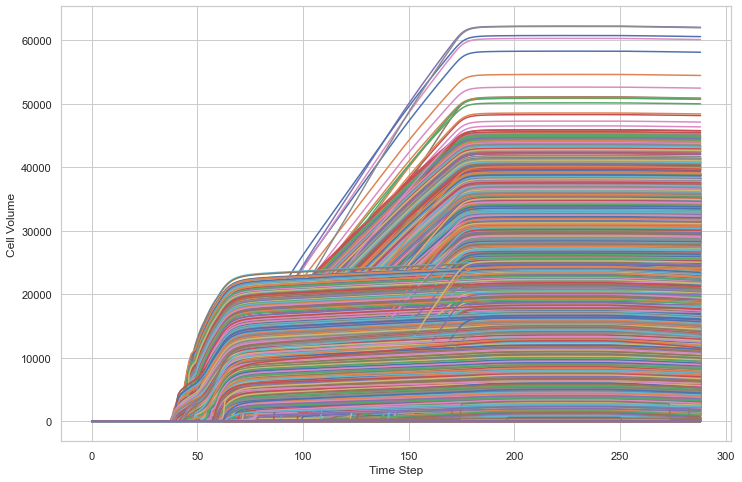

In [4]:
ax = cell_volumes_df.plot(legend=None)
ax.set_xlabel('Time Step')
ax.set_ylabel('Cell Volume')

## Example: Compute the cell face areas for the Muncie example watershed

### Read the data

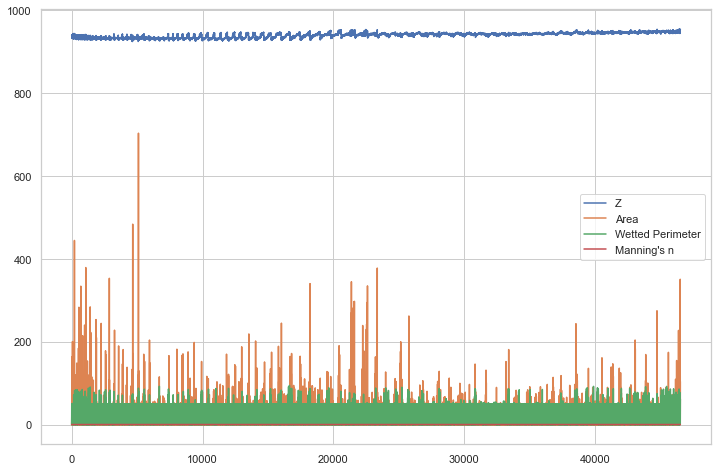

In [5]:
# HEC-RAS input file
infile = '../tests/input_files/Muncie.p04.hdf'

# Results time series: Water Surface Elevation
water_surface_elev_xr = cw.read_dataset_xarray(infile, 'Results/Unsteady/Output/Output Blocks/Base Output/Unsteady Time Series/2D Flow Areas/2D Interior Area/Water Surface', dims = ['Time', 'Cells'])

# Geometry: Cell Face Areas
faces_area_elevation_info_df = cw.read_dataset_pandas(infile, 'Geometry/2D Flow Areas/2D Interior Area/Faces Area Elevation Info')
faces_area_elevation_values_df = cw.read_dataset_pandas(infile, 'Geometry/2D Flow Areas/2D Interior Area/Faces Area Elevation Values')
faces_area_elevation_values_df.plot()
faces_normalunitvector_and_length_df = cw.read_dataset_pandas(infile, 'Geometry/2D Flow Areas/2D Interior Area/Faces NormalUnitVector and Length')
faces_cell_indexes_df = cw.read_dataset_pandas(infile, 'Geometry/2D Flow Areas/2D Interior Area/Faces Cell Indexes')

# Display the data
# display(water_surface_elev_xr)
# display(faces_area_elevation_info_df)
# display(faces_area_elevation_values_df)
# display(faces_normalunitvector_and_length_df)
# display(faces_cell_indexes_df)
# water_surface_elev_xr.plot()
# faces_area_elevation_info_df.plot()
# faces_area_elevation_values_df.plot()
# faces_normalunitvector_and_length_df.plot()
# faces_cell_indexes_df.plot()

### Compute the face areas

In [6]:
# ntimes = 289
# ncells = 5765
# nfaces = 11164
ntimes, ncells = water_surface_elev_xr.shape
nfaces = faces_cell_indexes_df.shape[0]

Compute face areas using Cell 0 in the "Faces Cell Indexes" dataset:

In [7]:
face_areas_0 = cw.compute_face_areas(
    water_surface_elev_xr.values,
    faces_normalunitvector_and_length_df['Face Length'].values,
    faces_cell_indexes_df['Cell 0'].values,
    faces_area_elevation_info_df['Starting Index'].values,
    faces_area_elevation_info_df['Count'].values,
    faces_area_elevation_values_df['Z'].values,
    faces_area_elevation_values_df['Area'].values,
    ntimes,
    ncells,
    nfaces)
face_areas_0_df = pd.DataFrame(face_areas_0, columns = range(nfaces))

Compute face areas using Cell 1 in the "Faces Cell Indexes" dataset

In [8]:
face_areas_1 = cw.compute_face_areas(
    water_surface_elev_xr.values,
    faces_normalunitvector_and_length_df['Face Length'].values,
    faces_cell_indexes_df['Cell 1'].values,
    faces_area_elevation_info_df['Starting Index'].values,
    faces_area_elevation_info_df['Count'].values,
    faces_area_elevation_values_df['Z'].values,
    faces_area_elevation_values_df['Area'].values,
    ntimes,
    ncells,
    nfaces)
face_areas_1_df = pd.DataFrame(face_areas_1, columns = range(nfaces))

### Plot the face areas computed using the water surface elevation of Cell 0 in the "Faces Cell Indexes" dataset

Text(0, 0.5, 'Face Area (Using Cell 0 WSE)')

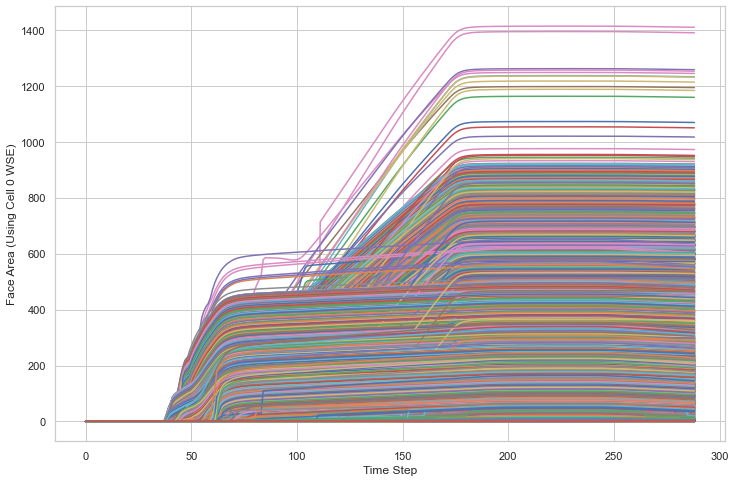

In [9]:
ax = face_areas_0_df.plot(legend=None)
ax.set_xlabel('Time Step')
ax.set_ylabel('Face Area (Using Cell 0 WSE)')

### Plot the face areas computed using the water surface elevation of Cell 1 in the "Faces Cell Indexes" dataset

Text(0, 0.5, 'Face Area (Using Cell 1 WSE)')

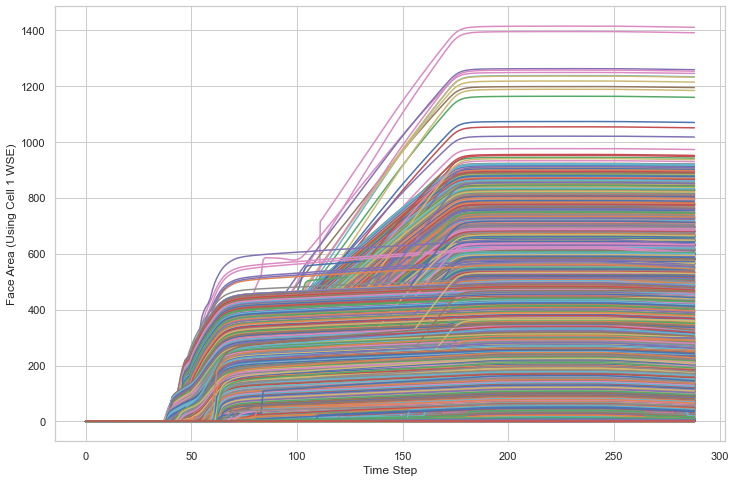

In [10]:
ax = face_areas_1_df.plot(legend=None)
ax.set_xlabel('Time Step')
ax.set_ylabel('Face Area (Using Cell 1 WSE)')

Text(0, 0.5, 'Face Area Difference (Cell_1_area - Cell_0_area)')

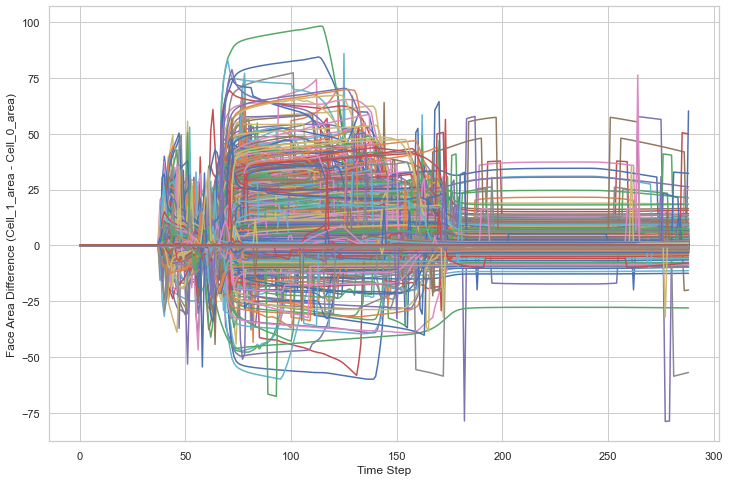

In [11]:
face_area_differences_df = face_areas_1_df - face_areas_0_df
ax = face_area_differences_df.plot(legend=None)
ax.set_xlabel('Time Step')
ax.set_ylabel('Face Area Difference (Cell_1_area - Cell_0_area)')

Text(0, 0.5, 'Face Area Percent Difference (Cell_1_area vs. Cell_0_area)')

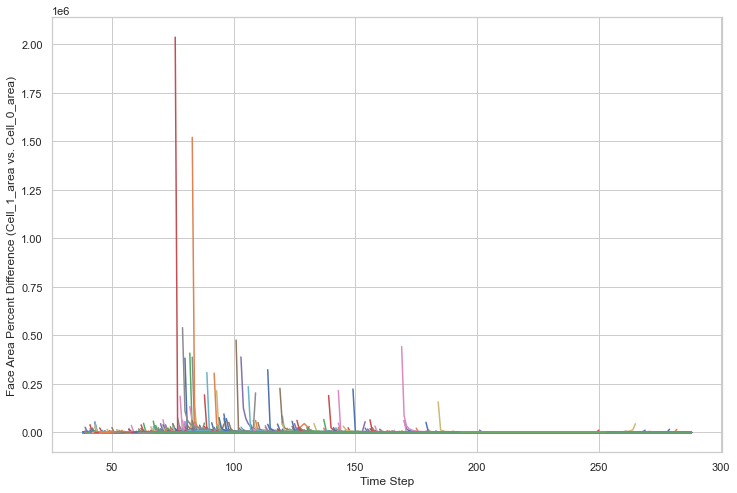

In [12]:
face_area_percent_differences_df = (face_areas_1_df - face_areas_0_df) / face_areas_0_df * 100
ax = face_area_percent_differences_df.plot(legend=None)
ax.set_xlabel('Time Step')
ax.set_ylabel('Face Area Percent Difference (Cell_1_area vs. Cell_0_area)')